## Week 4 SVM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

C:\Users\David\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
X ,y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.60)

df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
df.head()

,x,y,label
0,3.353209,1.699580,1
1,1.366786,0.634972,1
2,0.224593,4.770282,0
3,0.443599,3.115309,0
4,2.768085,1.087829,1


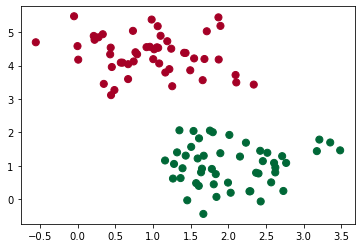

In [4]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap="RdYlGn");

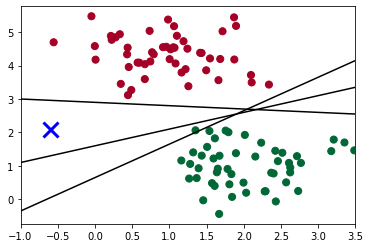

In [6]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='RdYlGn')
plt.plot([-0.6], [2.1], 'x', color='blue', markeredgewidth=3, markersize=15)

for m, b in [(1,0.65), (0.5, 1.6), (-0.1, 2.9)]:
    plt.plot(xfit, m*xfit + b, '-k')
plt.xlim(-1, 3.5);

(-1.0, 3.5)

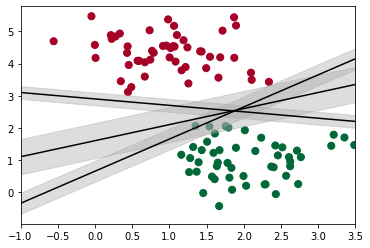

In [7]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap="RdYlGn")

for m, b, d in [(1,0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)
plt.xlim(-1, 3.5)
    

In [9]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, kernel='linear')

In [12]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X,Y,P,colors='k', levels=[-1,-1], alpha=0.5, linestyles=['--','-','--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:,1], s=300, linewidth=1, facecolors='none')
        plt.plot([1], [3.057891], 'o', color='green', markeredgewidth=1, markersize=7)
        plt.plot([1], [3.5057891], 'o', color='green', markeredgewidth=1, markersize=7)
        
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 900 and the array at index 1 has size 30

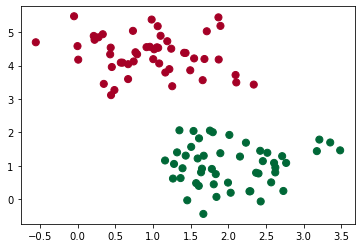

In [13]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdYlGn')
plot_svc_decision_function(model)

In [15]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


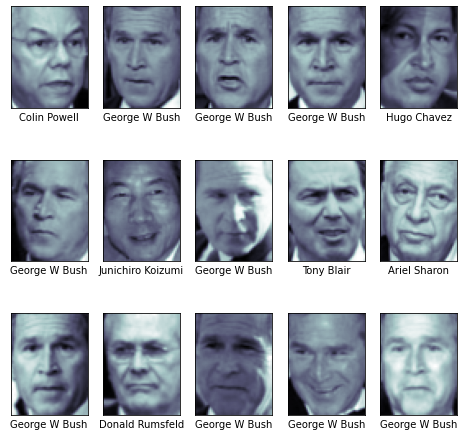

In [17]:
fig, ax = plt.subplots(3,5,figsize=(8,8))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[i]])

In [19]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, = train_test_split(faces.data, faces.target, random_state=42)


In [21]:
# check the shape of the data
print(f'The size of the Training set is {X_train.shape[0]}')
print(f'The size of the Training set is {X_test.shape[0]}')
# notice the number of column in the dataset
print(f'The number of columns in the training and testing set is {X_train.shape[1]}')

The size of the Training set is 1011
The size of the Training set is 337
The number of columns in the training and testing set is 2914


In [22]:
print(f'Type of X_train {type(X_train)}')
print(f'Type of y_train {type(y_train)}')

Type of X_train <class 'numpy.ndarray'>
Type of y_train <class 'numpy.ndarray'>


In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1,5,10,50],
             'svc__gamma': [0.0001,0.0005,0.001,0.005]}
grid = GridSearchCV(model, param_grid)


In [26]:
warnings.filterwarnings('ignore')

grid.fit(X_train, y_train)
best_params = grid.best_params_

In [27]:
print(best_params)

{'svc__C': 10, 'svc__gamma': 0.001}


In [28]:
model = grid.best_estimator_
y_predicted = model.predict(X_test)

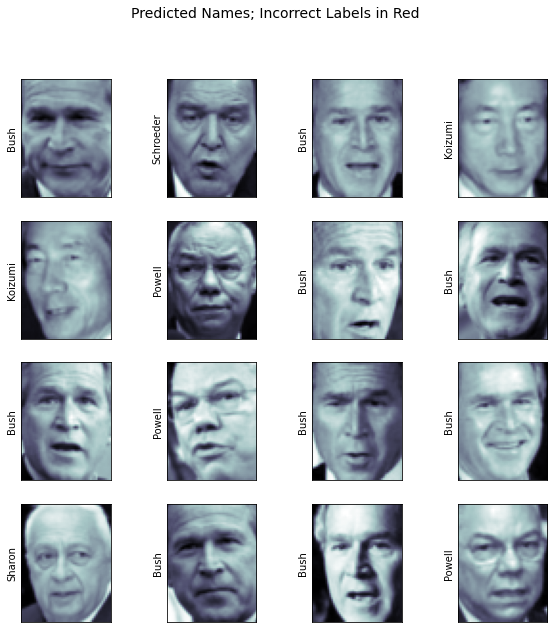

In [31]:
fig, ax = plt.subplots(4,4,figsize=(10,10))
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[y_predicted[i]].split()[-1], color='black' if y_predicted[i] == y_test[i] else 'red')
    fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



Text(91.68, 0.5, 'Predicted Label')

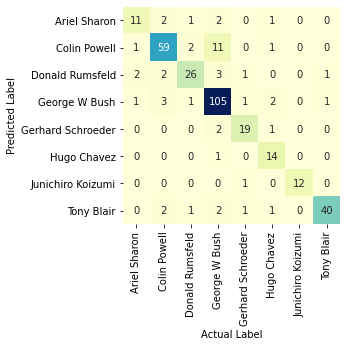

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y_test, y_predicted)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap="YlGnBu", xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')

In [ ]:
import pickle

pkl_filename = 'svm_model.pkl'
with open(fkl_filename, 'wb') as file:
    pickle.dump(model, file)
